# Вариационный Автоэнкодер

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist # библиотека MNIST
from tensorflow.keras.layers import Dense, Input,Flatten,Reshape

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
#стандартизация входных данных
x_train = x_train/255 # 0-1
x_test = x_test/255

x_train = np.reshape(x_train,(len(x_train),28,28,1))
x_test = np.reshape(x_test,(len(x_test),28,28,1))

In [3]:
input_img = Input((28,28,1)) # изображение будет 28 на 28 пикселей в градациях серого
x = Flatten()(input_img) # вытягиваем в один вектор в один массив
x = Dense(128,activation='relu')(x)
x = Dense(64,activation='relu')(x)
encoded = Dense(2,activation='linear')(x)

input_enc = Input(shape=(2,))
d = Dense(64,activation='relu')(input_enc)
d = Dense(28*28,activation='sigmoid')(d) # выдаёт данные от нюля до единицы
decoded = Reshape((28,28,1))(d)

encoder = keras.Model(input_img,encoded,name='encoder')
decoder = keras.Model(input_enc,decoded,name='decoder')
autoencoder = keras.Model(input_img,decoder(encoder(input_img)),name="autoencoder")
autoencoder.compile(optimizer='adam',loss='mean_squared_error')

In [5]:
autoencoder.fit(x_train,x_train,epochs=10,batch_size=64,shuffle=True)

Epoch 1/10
938/938 [==============================] - 4s 3ms/step - loss: 0.0595
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0493
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0468
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0453
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0444
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0437
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0431
Epoch 8/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0427
Epoch 9/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0423
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0420


In [6]:
h = encoder.predict(x_test)

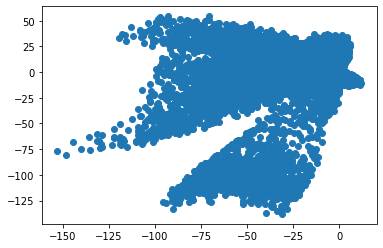

In [7]:
a = plt.scatter(h[:,0],h[:,1])

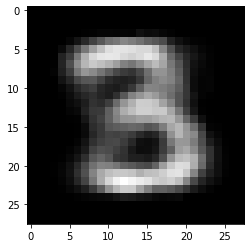

In [26]:
img = decoder.predict(np.expand_dims([1,1],axis = 0)) #можно менять [1,1]
plt.imshow(img.squeeze(),cmap='gray')